In [1]:
import pandas as pd
import numpy as np

file_path = 'En_In.xls'
data = pd.read_excel(file_path, skiprows=17, usecols="C:F", 
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

data['Energy Supply'] = np.where(data['Energy Supply'] == "...", np.nan, data['Energy Supply'])

data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')

data['Energy Supply'] = data['Energy Supply'] * 1e6

data['Country'] = data['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region3": "Hong Kong"
})

data['Country'] = data['Country'].str.replace(r'\d+[\s\([^)]*\)', '', regex=True)

filtered_data = data.loc[data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

filtered_data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [3]:
gdp_data = pd.read_csv('gpd.csv', skiprows=4)

gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "Korea. Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, Chine": "Hong Kong"
})

gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [7]:
scimago_data = pd.read_excel('scimagojr.xlsx')

scimago_data.head()

top_countries = scimago_data[scimago_data['Rank'] <= 15]

gdp_last_10_years = gdp_data[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

gdp_last_10_years = gdp_last_10_years.rename(columns={'Country Name': 'Country'})

combined_data = pd.merge(top_countries, data, how='inner', on='Country')
combined_data = pd.merge(combined_data, gdp_last_10_years, how='inner', on='Country')

combined_data.set_index('Country', inplace=True)

data['Country'] = data['Country'].replace({
    "United States of America": "United States",
    "United Kingdom of Great Britan and Northern Ireland": "United Kingdom"
})

gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "United States": "United States",
    "United Kingdom": "United Kingdom"
})

result = combined_data[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                        'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].sort_values(by='Rank').head(15)

print(result.shape)
result.head()

(13, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [9]:
def task_eight():
    avg_gdp = result[['2006', '2007', '2008', '2009', '2010',
                      '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    
    avg_gdp_series = avg_gdp.sort_values(ascending=False)
    avg_gdp_series.name = "avgGDP"
    return avg_gdp_series

task_eight_result = task_eight()
print(task_eight_result)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
Name: avgGDP, dtype: float64


In [11]:
def task_nine():
    avg_gdp_series = task_eight()
    fifth_country = avg_gdp_series.index[4]
    gdp_difference = result.loc[fifth_country, '2015'] - result.loc[fifth_country, '2006']
    return (fifth_country, gdp_difference)

task_nine_result = task_nine()
print(task_nine_result)

('France', 153345695364.24023)


In [13]:
def task_ten():
    max_renewable_country = result['% Renewable'].idxmax()
    max_renewable_value = result['% Renewable'].max()
    return (max_renewable_country, max_renewable_value)

task_ten_result = task_ten()
print(task_ten_result)

('Brazil', 69.64803)


In [15]:
def task_eleven():
    result['Estimated Population'] = result['Energy Supply'] / result['Energy Supply per Capita']
    sorted_population = result['Estimated Population'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    return (sixth_country, sixth_population)

task_eleven_result = task_eleven()
print(task_eleven_result)

('Japan', 127409395.97315437)


In [17]:
def task_twelve():
    result['Citations per Capita'] = result['Citations'] / result['Estimated Population']
    correlation = result['Citations per Capita'].corr(result['Energy Supply per Capita'])
    print(correlation)

task_twelve()

0.6668305580438934


In [19]:
def task_thirteen():
    median_renewable = result['% Renewable'].median()
    result['HighRenew'] = (result['% Renewable'] >= median_renewable).astype(int)
    sorted_series = result.sort_values('Rank')['HighRenew']
    print(sorted_series)

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
Italy                 1
Spain                 1
Australia             0
Brazil                1
Name: HighRenew, dtype: int32


In [21]:
def taks_fourteen():
    ContinentDict  = {'China':'Asia',  
                      'United States':'North America',  
                      'Japan':'Asia',  
                      'United Kingdom':'Europe',  
                      'Russian Federation':'Europe',  
                      'Canada':'North America',  
                      'Germany':'Europe',  
                      'India':'Asia', 
                      'France':'Europe',  
                      'South Korea':'Asia',  
                      'Italy':'Europe',  
                      'Spain':'Europe',  
                      'Iran':'Asia', 
                      'Australia':'Australia',  
                      'Brazil':'South America'}
    result['Continent'] = result.index.map(ContinentDict)
    grouped = result.groupby('Continent')['Estimated Population']
    summary_df = grouped.agg(['size', 'sum', 'mean', 'std'])
    summary_df = summary_df.round(5)
    print(summary_df)

taks_fourteen()

               size                sum              mean           std
Continent                                                             
Asia              3  2771785326.494246  923928442.164749  6.913019e+08
Australia         1    23316017.316017   23316017.316017           NaN
Europe            6   457929667.216372   76321611.202729  3.464767e+07
North America     2    352855249.48025  176427624.740125  1.996696e+08
South America     1   205915254.237288  205915254.237288           NaN


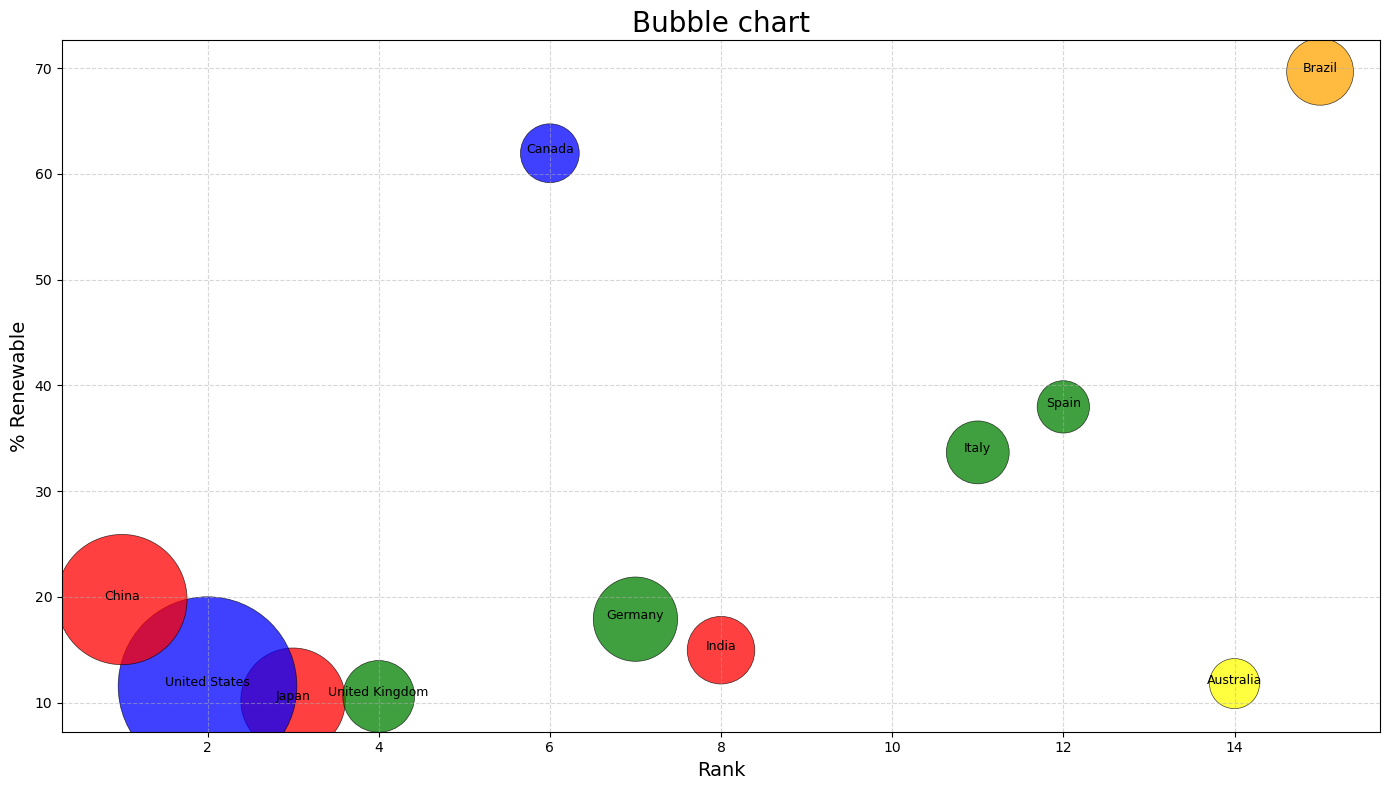

In [23]:
import matplotlib.pyplot as plt

def task_fifteen():
    colors = {
    "Asia": "red",
    "North America": "blue",
    "Europe": "green",
    "Australia": "yellow",
    "South America": "orange"
    }
    ContinentDict  = {
        'China':'Asia',  
        'United States':'North America',  
        'Japan':'Asia',  
        'United Kingdom':'Europe',  
        'Russian Federation':'Europe',  
        'Canada':'North America',  
        'Germany':'Europe',  
        'India':'Asia', 
        'France':'Europe',  
        'South Korea':'Asia',  
        'Italy':'Europe',  
        'Spain':'Europe',  
        'Iran':'Asia', 
        'Australia':'Australia',
        'Brazil':'South America'
        }
    result['Continent'] = result.index.map(ContinentDict)
    result['Color'] = result['Continent'].map(colors)
    
    required_countries = {
    'China', 'United States', 'Japan', 'United Kingdom', 'Russian Fedetation', 'Canada', 'Germany', 'India', 'France'
    'South Korea', 'Italy', 'Spain', 'Iran', 'Australia', 'Brazil'
    }
    existing_countries = [country for country in required_countries if country in result.index]
    filtered_result = result.loc[existing_countries]
    
    plt.figure(figsize=(14, 8))
    plt.scatter(
    filtered_result['Rank'],
    filtered_result['% Renewable'],
    s=filtered_result['2015'] / 1e9,
    c=filtered_result['Color'],
    alpha=0.75,
    edgecolors='k',
    linewidth=0.5
    )
    for country in filtered_result.index:
        plt.text(
            filtered_result['Rank'][country],
            filtered_result['% Renewable'][country],
            country,
            fontsize=9,
            ha='center'
        )
    plt.title('Bubble chart', fontsize=20)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel('% Renewable', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

task_fifteen()